In [1]:
from kid_readout.utils import roach_interface, roach_utils

In [2]:
r = roach_interface.RoachBaseband()

Loaded ROACH state from /home/data/roach_config.npz


There were 31 waveforms loaded previously. This is an ''n_waveforms'' by ''n_frequencies'' array of integers that represent tones:

In [3]:
r.tone_bins.shape

(31, 16)

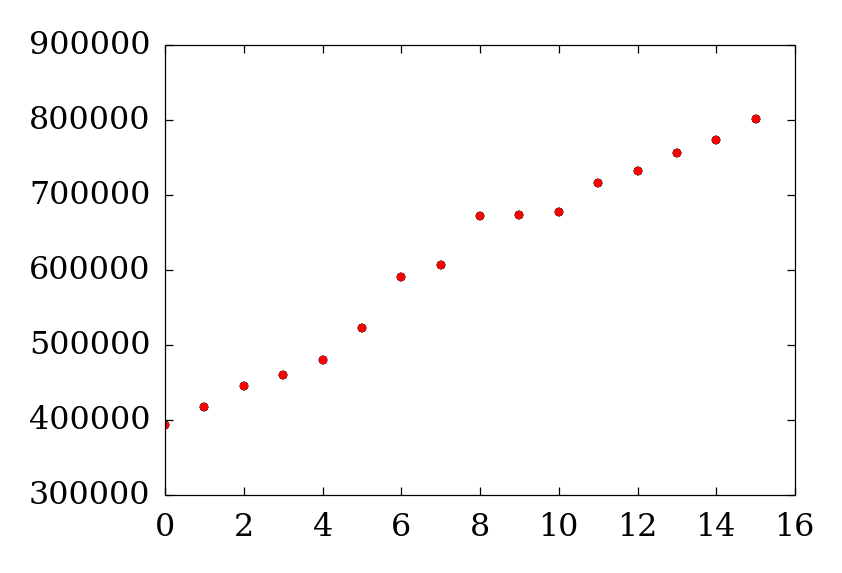

In [4]:
[plt.plot(bin, '.') for bin in r.tone_bins];

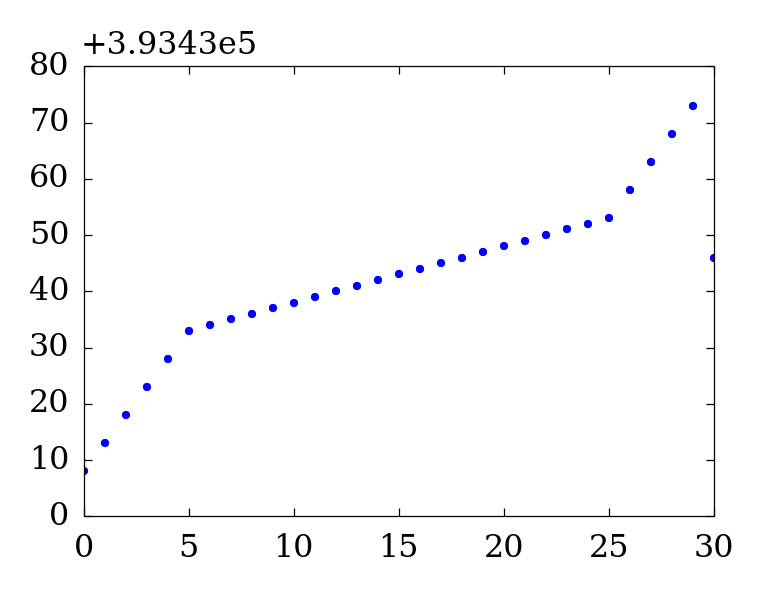

In [5]:
plt.plot(r.tone_bins[:, 0], '.')

This has the same shape as the array of tone bins, but the integers are different:

In [6]:
r.fft_bins.shape

(31, 16)

In [7]:
r.tone_bins / r.fft_bins

array([[ 64.00488043,  64.00168582,  63.99885173,  64.00389755,
         64.00133245,  63.99767669,  63.99902471,  64.00252978,
         63.99961908,  63.99705323,  63.99933875,  63.99946414,
         63.99860286,  63.99729089,  63.99958633,  64.0011976 ],
       [ 63.99528302,  64.00245211,  63.9995694 ,  63.99568546,
         64.00199867,  63.99828809,  63.99956654,  64.00305681,
         64.00009523,  63.99752852,  63.99981107,  63.99991069,
         63.99903947,  63.99771419,  64.        ,  64.00159681],
       [ 63.99609629,  64.00321839,  64.00028707,  63.99638135,
         64.00266489,  63.99889949,  64.00010837,  63.99683811,
         64.00057137,  63.9980038 ,  64.00028339,  64.00035724,
         63.99947607,  63.99813749,  64.00041367,  64.00199601],
       [ 63.99690956,  64.00398467,  64.00100474,  63.99707724,
         64.00333111,  63.99951088,  64.0006502 ,  63.99736509,
         64.00104752,  63.99847909,  64.00075572,  64.00080379,
         63.99991268,  63.99856079,  

In [14]:
r.fft_bins.dtype

dtype('int64')

In [15]:
r.tone_bins.dtype

dtype('int64')

I don't understand how or where this is being used:

In [9]:
print(r.bank)

None


In [10]:
print(r.get_current_bank())

None


Now time for some math. This is the number of bytes that the dd call in RoachBaseband._load_dram_ssh() says corresponds to 67 MB:

In [11]:
67108864 / 2**20

64.0

The PPC can access 64 MiB at a time, so the data is split into "banks" of this size.

This is the number of 512 byte "records" that dd reports reading and writing:

In [12]:
n_records = 131072
n_records * 512 / 2**20 # in MiB

64.0

This is an independent check of the data size, and everything makes sense here.

In [19]:
x, y = r.get_raw_adc()

In [20]:
x.size

4096

In [21]:
y.size

4096

In [23]:
x.dtype

dtype('float64')

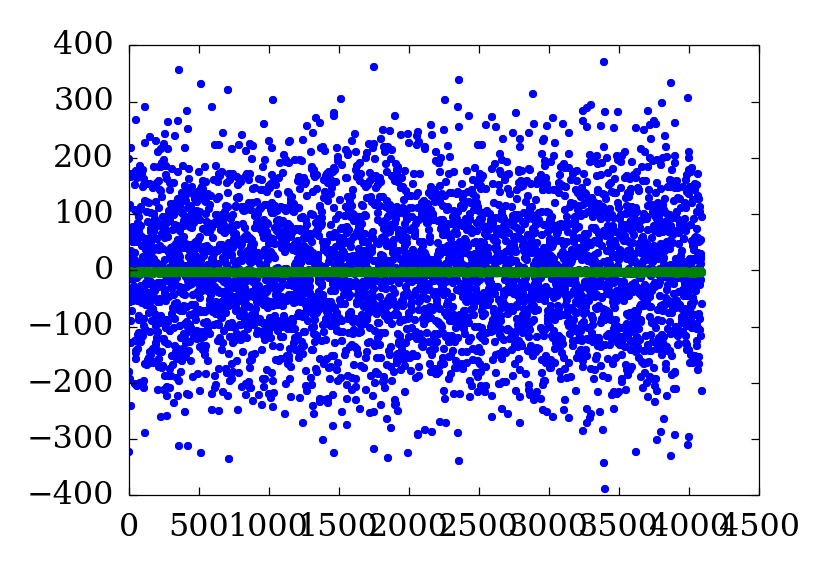

In [22]:
plt.plot(x, '.')
plt.plot(y, '.')